<a href="https://colab.research.google.com/github/anhhaibkhn/LeetCode_Daily_Challenges/blob/master/Leetcode_2021_MayJune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

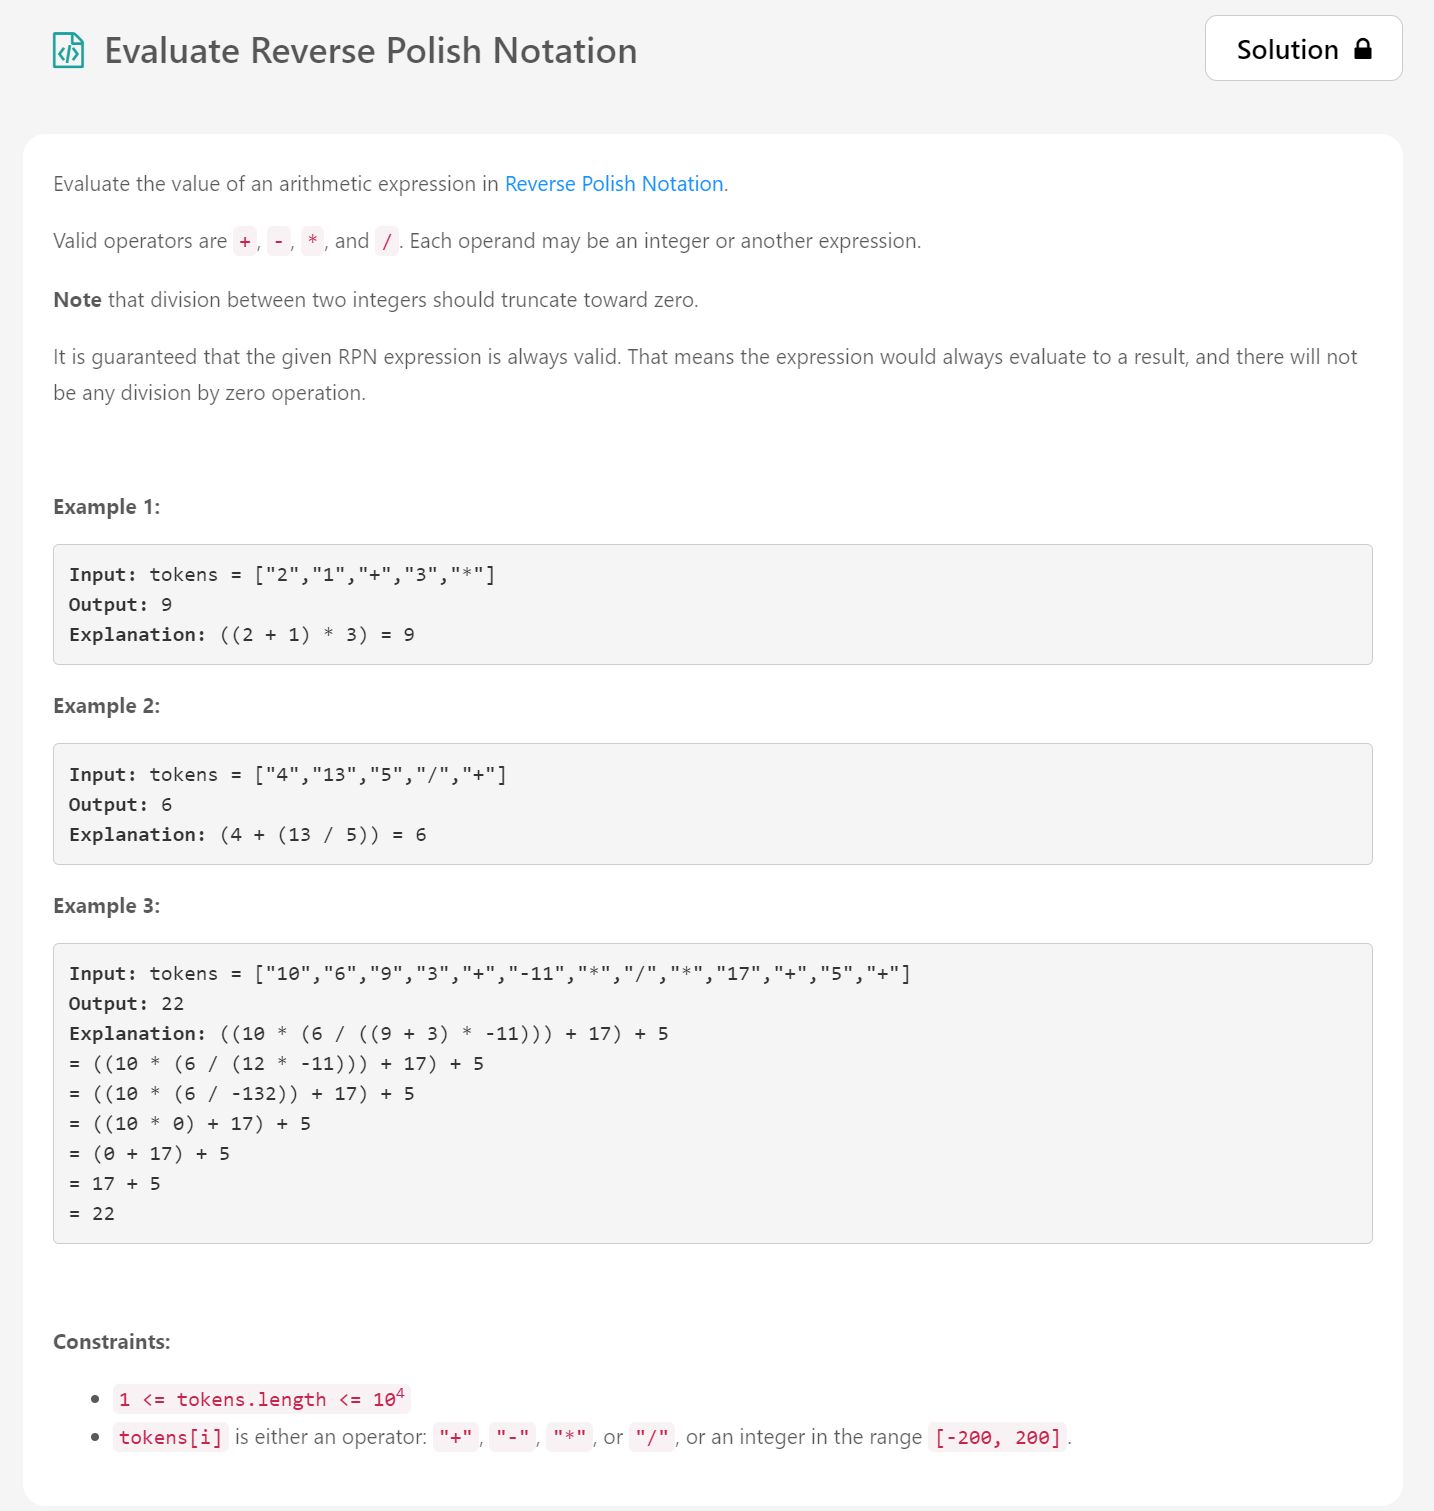

In [ ]:
# Using stack
class Solution:
    def evalRPN(self, tokens: List[str]) -> int:
        stk = []
        for token in tokens:
            # token is operand
            if token in "+-*/":
                y = stk.pop()
                x = stk.pop()
                if token == "+":
                    stk.append(x + y)
                elif token == "-":
                    stk.append(x - y)
                elif token == "*":
                    stk.append(x * y)
                elif token == "/":
                    stk.append(int(x/y))
            else:
                # token is number
                stk.append(int(token))


        return stk.pop()
        